# Histograma
Muestra la distribución de una variable numérica como un conjunto de barras. Los datos numéricos se agrupan en "bins" (clases o grupos) segun un rango de valores. Cada "bin" va a tener una barra. La altura de la barra representa cuantos puntos de datos existen dentro del rango del "bin". Usualmente es el primer gráfico a realizar de todas las columnas numéricas de mi dataset ya que me dice como se distribuyen mis datos. Esto, por ejemplo, me permite escoger pruebas estadísticas correctas que asumen cierta distribución. *Este es el primer gráfico que analizamos en esta parte práctica que nos permitirá ver la forma de una distribución.*  
**Eje X**: Rangos o Bins de la variable numérica    
**Eje Y**: Frecuencia absoluta o relativa de cada "bin"   
**Otros nombres**: Histogram     

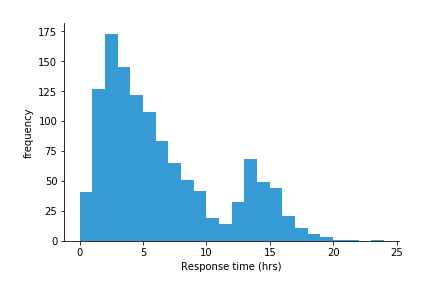


### Cuando utilizar
- Quiero observar como se distribuyen mis datos
- Quiero observar la forma de la distribución de mis datos (ejemplo: normal, sesgada, uniforme, bimodal, multimodal)

### Consejos
- Siempre la base del Eje Y tiene que ser el cero.
- Elegimos un número de "bins" que me permita observar la verdadera distribución. Elegir un número muy pequeño de bins puede darme resultados engañosos.
- El rango de cada uno de los "bins" tiene que ser exactamente el mismo. Es decir si el primer bin va a contener la frecuencia de los valores de entre 5 a 10, el segundo bin tiene que ser de 10 a 15, el siguiente de 15 a 20, y así sucesivamente hasta cubrir todo mi rango de valores numéricos posibles de la variable analizada. 
- Barras verticales o horizontales? No hay preferencia. Usualmente verticales.
- Recuerda que no tiene sentido hallar distribuciones de variables categóricas. Para esto utiliza un simple diagrama de barras que cuente cuantos puntos caen en cada categoría.


## En esta clase
### Datos
Información sobre los pasajeros del Titanic
### Objetivo
1. Como es la distribución de edades de Hombres y Mujeres?
2. Como es la distribución del precio pagado por los pasajes en el titanic?

## Referencias
- https://datavizcatalogue.com/ES/metodos/histograma.html
- https://es.wikipedia.org/wiki/Histograma
- https://chartio.com/learn/charts/histogram-complete-guide/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Eliminar datos vacios
df = df.dropna(subset=['Age'], axis='index')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# ----- Explicación de Generacion de Bins -----
import numpy as np
count, division = np.histogram(df['Age'], bins=10) # 10 bins
print("BINS GENERADOS")
for i in range(len(division)-1):
    print("De", round(division[i], 2), "a", round(division[i+1], 2), ": Hay", count[i], "valores")

BINS GENERADOS
De 0.42 a 8.38 : Hay 54 valores
De 8.38 a 16.34 : Hay 46 valores
De 16.34 a 24.29 : Hay 177 valores
De 24.29 a 32.25 : Hay 169 valores
De 32.25 a 40.21 : Hay 118 valores
De 40.21 a 48.17 : Hay 70 valores
De 48.17 a 56.13 : Hay 45 valores
De 56.13 a 64.08 : Hay 24 valores
De 64.08 a 72.04 : Hay 9 valores
De 72.04 a 80.0 : Hay 2 valores


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

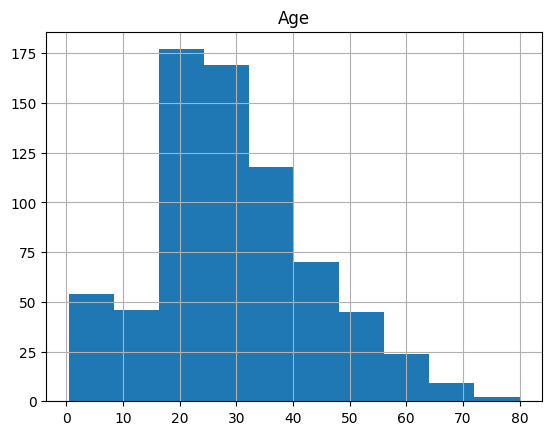

In [5]:
# Histograma con Pandas (Matplotlib)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
df.hist(
    'Age',
    bins=10
)

array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

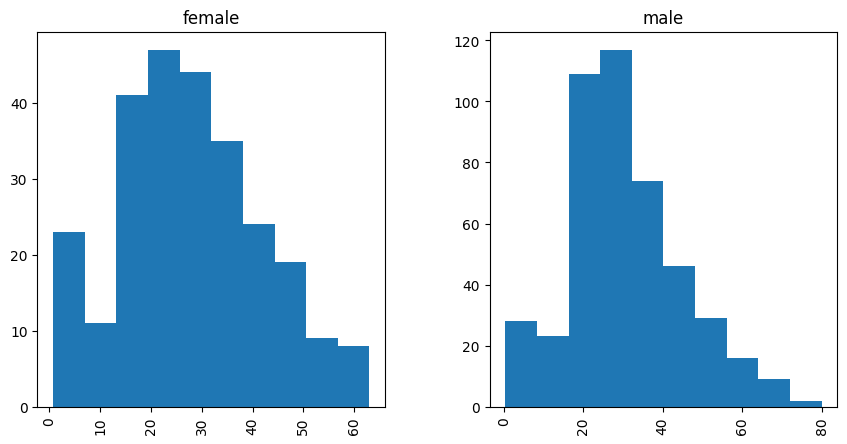

In [6]:
# Histograma con Pandas (Matplotlib)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
df.hist(
    'Age',
    by='Sex',
    figsize=(10, 5)
)

# Kernel Density Estimator (KDE)
En el histograma es a veces complicado visualizar la forma de mi distribución. El Kernel Density Estimator crea una curva/función de probabilidad basado en la distribución de mis datos. Se lo puede resumir como un suavizado del histograma, sin embargo, estadísticamente tiene una representación mas compleja. En breves palabras, crea una curva que me indica en el Eje Y la probabilidad de que una nueva observación de esa variable tenga ese valor del Eje X. Usualmente se lo presenta en el mismo gráfico que el Histograma.   
**Eje X**: Rango de la variable numérica   
**Eje Y**: Probabilidad de que un nuevo punto tenga ese valor.       

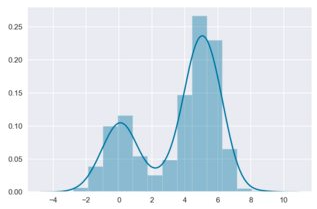


### Cuando utilizar
- Quiero observar como se distribuyen mis datos
- Quiero observar la forma de la distribución de mis datos (ejemplo: normal, sesgada, uniforme, bimodal, multimodal)
- Quiero presentar un Histograma de una forma mas profesional

### Consejos
- Mismos del histograma
- Es visto como un gráfico bastante profesional


## Referencias
- https://datavizcatalogue.com/ES/metodos/grafico_de_densidad.html
- https://en.wikipedia.org/wiki/Kernel_density_estimation
- La explicación en detalle del KDE: https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12

<Axes: xlabel='Age', ylabel='Count'>

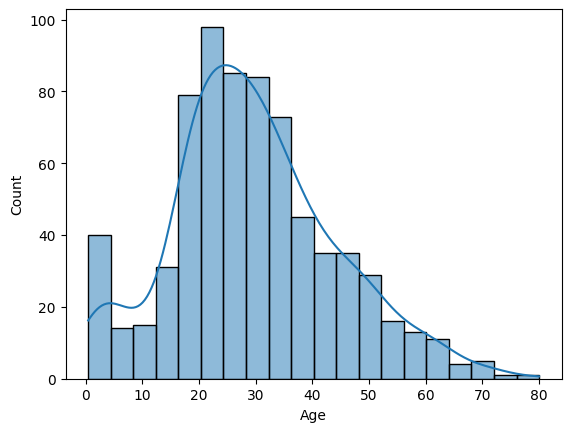

In [7]:
# KDE con Seaborn
# https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
sns.histplot(
    data=df,
    x='Age',
    kde=True,
#     bins=5
#     element="step",  # Representacion visual de las "barras"
#     stat='probability',  
)

<Axes: xlabel='Age', ylabel='Count'>

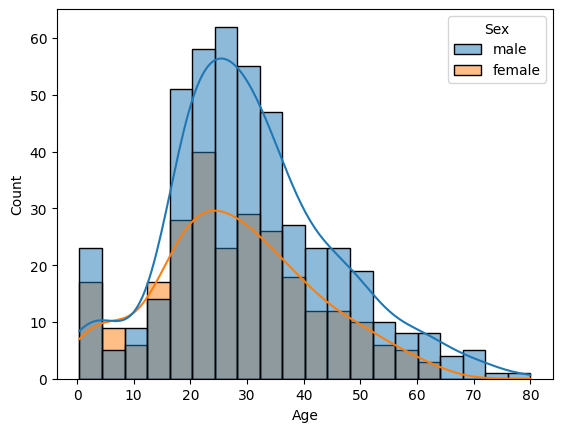

In [8]:
# KDE con Seaborn con Hue
# https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
sns.histplot(
    data=df,
    x='Age',
    kde=True,
    hue='Sex',
)

<Axes: xlabel='Age', ylabel='Count'>

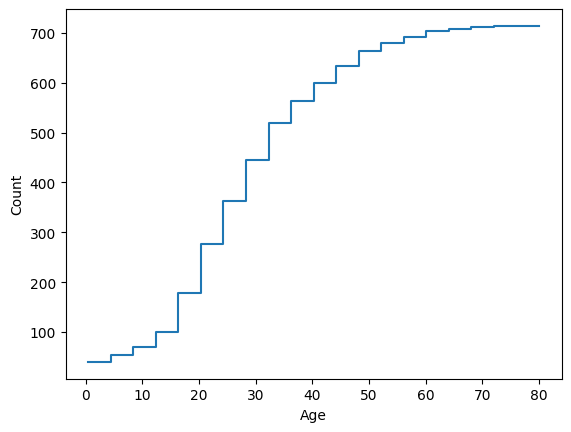

In [9]:
# Histograma Acumulativo
# Variante de los histogramas donde las frecuencias se van acumulando. Esto me permite observar 
# como se distribuyen mis datos desde otro punto de vista
# https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
sns.histplot(
    data=df,
    x='Age',
    cumulative=True,
    fill=False,
    element="step"
)